## MVP 4 - Qualidade de Software, Segurança e Sistemas Inteligentes
## Thyago Monteiro

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
import pickle

## Carga do Dataset

Dataset utilizado: [Fatores de Estresse em Estudantes](https://www.kaggle.com/datasets/samyakb/student-stress-factors)

Compreendendo o que Mais Impacta o Estresse dos Estudantes de Engenharia

Sobre o Conjunto de Dados
Estes dados foram coletados principalmente de estudantes de engenharia, testando os seguintes pontos de dados de 1 a 5.
sleep-quality	headaches	academic_performance	study_load	extracurricular_activities	stress_level
Por favor, avalie a qualidade do seu sono. (sleep-quality)

Quantas vezes por semana você sofre de dores de cabeça.(headaches)

Como você avaliaria seu desempenho acadêmico. (academic_performance)

Como você avaliaria sua carga de estudos. (study_load)

Quantas vezes por semana você pratica atividades extracurriculares. (extracurricular_activities)

Como você avaliaria seus níveis de estresse.(stress_level)

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThyMont/MVP4-Puc-Rio/main/Student%20Stress%20Factors.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,timestamp,sleep-quality,headaches,academic_performance,study_load,extracurricular_activities,stress_level
0,27/10/2023 21:54:15,3,1,3,4,2,3
1,28/10/2023 12:24:40,4,1,2,3,3,2
2,28/10/2023 12:24:51,2,1,2,1,4,4
3,28/10/2023 12:26:11,3,2,3,2,3,3
4,28/10/2023 12:26:45,2,3,1,5,5,3


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,1:6]
# y = array[:,6]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(array[:,6])

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


multiclass


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.220000 (0.134536)
CART: 0.180000 (0.192614)
NB: 0.315000 (0.165907)
SVM: 0.265000 (0.177553)


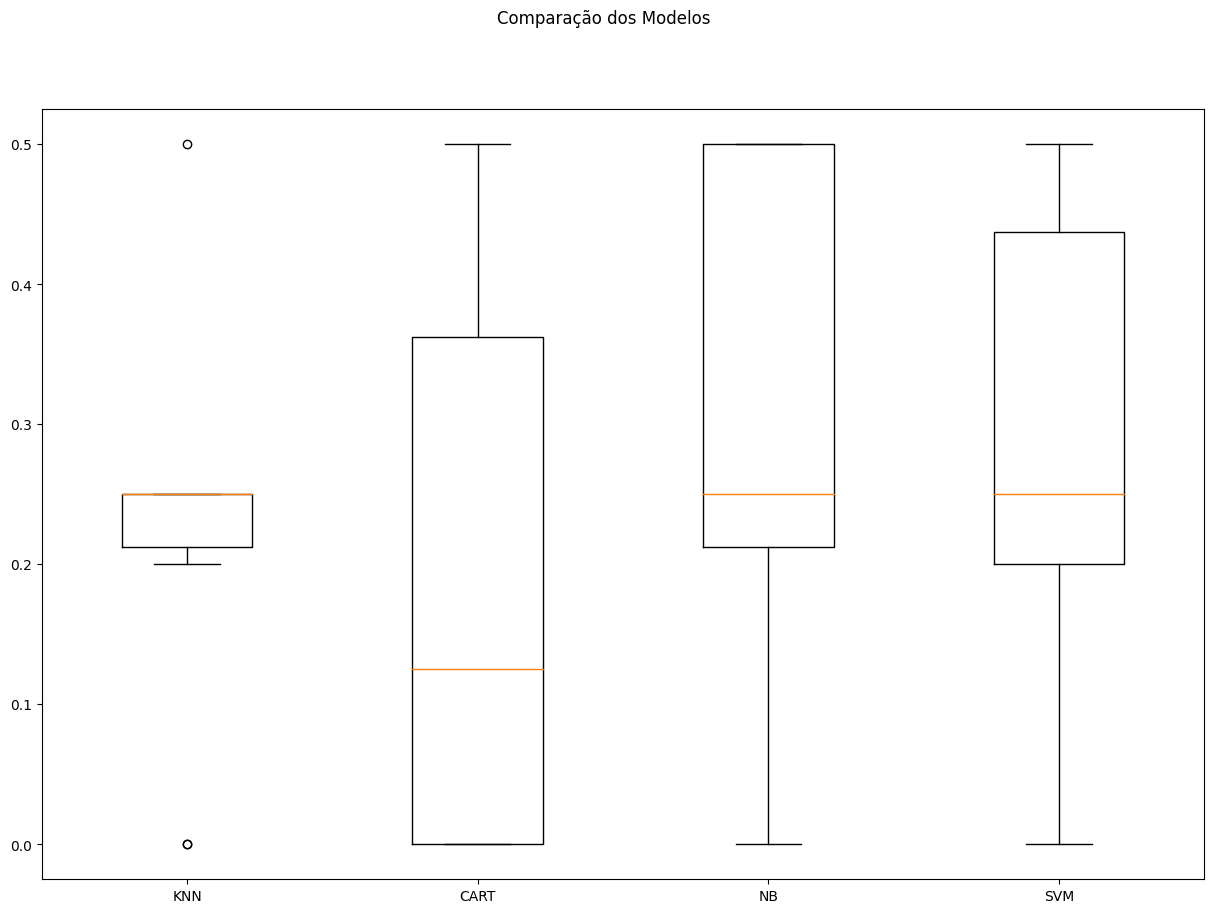

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.220 (0.135)
CART-orig: 0.180 (0.193)
NB-orig: 0.315 (0.166)
SVM-orig: 0.265 (0.178)
KNN-padr: 0.265 (0.138)
CART-padr: 0.205 (0.184)
NB-padr: 0.315 (0.166)
SVM-padr: 0.270 (0.176)
KNN-norm: 0.220 (0.135)
CART-norm: 0.230 (0.258)
NB-norm: 0.315 (0.166)
SVM-norm: 0.265 (0.178)


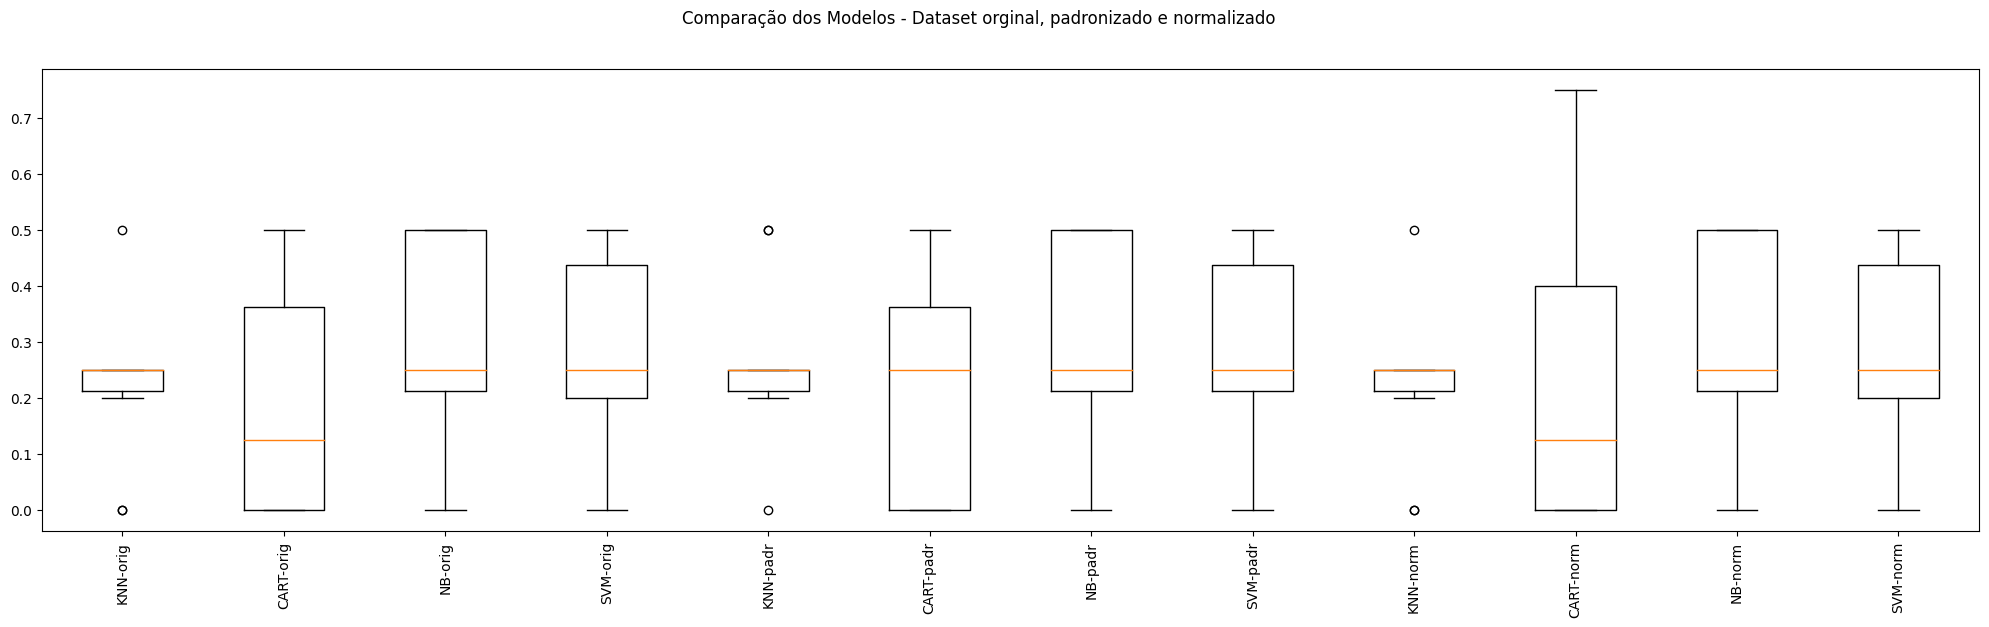

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do NB

np.random.seed(7)  # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
naive_bayes = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[naive_bayes])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, naive_bayes])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, naive_bayes])))

# Sem hiperparâmetros para ajustar no Naive Bayes

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid={}, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f" % (name, grid.best_score_))


Sem tratamento de missings: nb-orig - Melhor: 0.315000
Sem tratamento de missings: nb-padr - Melhor: 0.315000
Sem tratamento de missings: nb-norm - Melhor: 0.315000


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions_nb = model_nb.predict(X_test)
print(accuracy_score(y_test, predictions_nb))

0.18181818181818182


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('NB', GaussianNB())])

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'sleep-quality':  [5, 2, 1, 4, 4, 5],
        'headaches': [5, 2, 1, 3, 3, 1],
        'academic_performance': [4, 5, 1, 1, 3, 2],
        'study_load': [2, 5, 3, 1, 1, 1],
        'extracurricular_activities': [5, 3, 5, 4, 4, 2],
        }

atributos = ['sleep-quality', 'headaches', 'academic_performance', 'study_load', 'extracurricular_activities' ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.5565363   2.41263915  0.67660082 -0.5733843   1.47139331]
 [-0.96886443  0.01507899  1.55123115  1.54680417  0.07882464]
 [-1.81066467 -0.78410772 -1.94729017  0.13334519  1.47139331]
 [ 0.71473606  0.81426571 -1.94729017 -1.28011379  0.77510898]
 [ 0.71473606  0.81426571 -0.19802951 -1.28011379  0.77510898]
 [ 1.5565363  -0.78410772 -1.07265984 -1.28011379 -0.61745969]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)


pickle_out = open("modelo_treinado.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

[4 2 1 1 1 0]


**Análise dos Resultados da Avaliação dos Modelos:**

Os resultados da avaliação dos modelos apresentam variações significativas nas métricas de desempenho, considerando diferentes algoritmos de aprendizado de máquina e pré-processamentos dos dados. Abaixo estão algumas análises e pontos de atenção:

1. **Desempenho Geral:**
   - O desempenho geral dos modelos varia, com acurácias médias oscilando entre 0.18 e 0.315.

2. **Variação entre Modelos:**
   - O modelo Naive Bayes (`NB-orig`, `NB-padr`, `NB-norm`) obteve a maior acurácia em todas as configurações, mantendo uma consistência notável. No entanto, é importante notar que a diferença entre o melhor modelo (Naive Bayes) e os outros não é extremamente significativa.

3. **Influência do Pré-processamento:**
   - A padronização (`-padr`) e normalização (`-norm`) dos dados não resultaram em melhorias significativas de desempenho em comparação com o conjunto de dados original (`-orig`). Isso sugere que, para esse conjunto de dados específico, a complexidade adicionada pela padronização ou normalização pode não ser necessária.

4. **Modelo SVM:**
   - O modelo SVM (`SVM-orig`, `SVM-padr`, `SVM-norm`) teve um desempenho consistente, mas não se destacou significativamente em relação aos outros modelos.

5. **CART com Normalização:**
   - O modelo CART (`CART-norm`) apresentou uma variação notável, indicando uma possível sensibilidade do algoritmo à normalização dos dados. Essa variação pode ser um ponto de atenção, sugerindo a necessidade de uma análise mais aprofundada.

**Pontos de Atenção e Considerações:**

- A consistência do desempenho do Naive Bayes destaca sua robustez nesse conjunto de dados específico.
- A variação significativa no desempenho do modelo CART com normalização indica a sensibilidade do algoritmo a transformações nos dados.
- A diferença entre os melhores modelos e os outros não é ampla, sugerindo que a escolha do modelo pode depender de outros fatores, como interpretabilidade, custo computacional e requisitos específicos do problema.
- Ao avaliar os resultados dos diferentes modelos, observamos que a acurácia variou entre os métodos utilizados. Entendemos que, em alguns casos, a acurácia pode parecer relativamente baixa. É importante ressaltar que a escolha desses modelos e métricas foi realizada com propósitos didáticos, buscando ilustrar diferentes abordagens e técnicas de machine learning. Em ambientes práticos, a escolha do modelo e métricas deve ser cuidadosamente ponderada, considerando as características específicas do problema em questão.